In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('all_data.csv')
df.head(10)
df=df.rename(columns={'Life expectancy at birth (years)':'Age'})
print(df.head(10))


  Country  Year   Age           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10
5   Chile  2005  78.4  1.229650e+11
6   Chile  2006  78.9  1.547880e+11
7   Chile  2007  78.9  1.736060e+11
8   Chile  2008  79.6  1.796380e+11
9   Chile  2009  79.3  1.723890e+11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   Age      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,Year,Age,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Univariate analysis

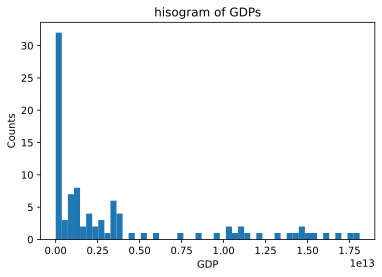

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
fig,ax=plt.subplots()
ax.hist(df['GDP'].values,bins=50);
ax.set_xlabel('GDP')
ax.set_ylabel('Counts')
ax.set_title('hisogram of GDPs');
plt.savefig('histogram.svg')

![hist](histogram.svg)


The data has a very strong righ skew, so a log scale might help get a better feeling for the distribution.

In [6]:
df['GDP_log']=np.log(df['GDP'])

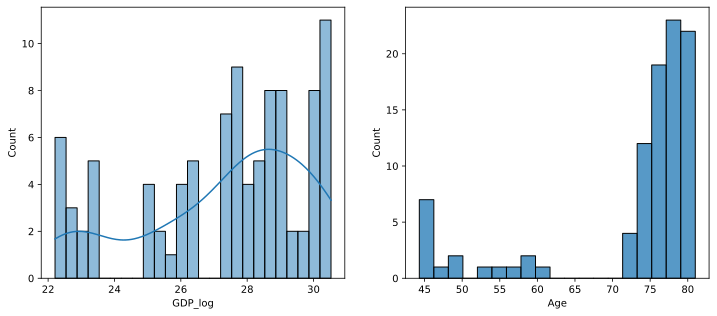

In [7]:
fig,axes=plt.subplots(1,2, figsize=(12,5))
sns.histplot(ax=axes[0], data=df,x='GDP_log', bins=25, kde=True)
sns.histplot(ax=axes[1],data=df,x='Age')
plt.savefig('histograms.png')

![hists](histograms.png)

There seem to be quite a few values on the left side of the log GDP plot, which got squished together in one bin on the normal scale, but are easier to visualize in the log plot.

Hmmm...the life expectancy data also is grouped in three like the log GDP data, coincidence or correlation? 
The group with the highest life expectancies has also by far the highest counts.

### Bivariate data analysis

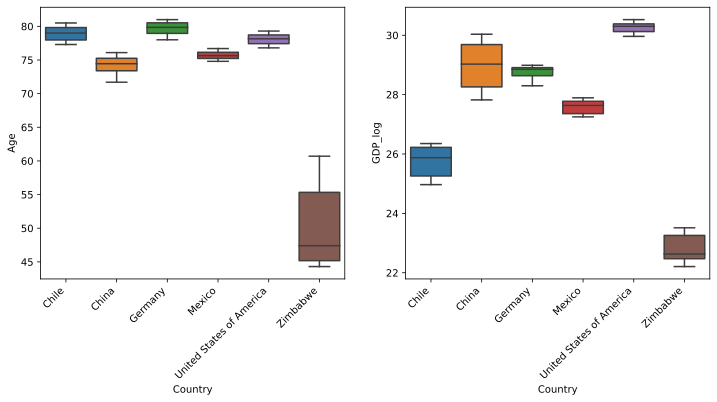

In [8]:
fig,axes=plt.subplots(1,2, figsize=(12,5))
sns.boxplot(ax=axes[0],data=df, x='Country', y='Age')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45, horizontalalignment='right')
sns.boxplot(ax=axes[1],data=df, x='Country', y='GDP_log')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45, horizontalalignment='right')
plt.savefig('boxplots.png')
None

![boxplots](boxplots.png)

So all the life expectancy histogram data below 70 belogs to Zimbabwe...the left skew of the distribution fits with the boxplot representation. While Germany and the US are obviously rich countries, Chile and Mexico are less wealthy but still have very high life expectancies, especially Chile...

The US has the highest GDP as expected, but also as extected Chile's GDP is not that high. it looks like the left group of bins on the GDP histogram belongs to Zimbabwe, the middle one to Chile, and the rest of the countries belong to the high GDP group on the right. Still, the population of China is several times higher than that of the US and Germany, so maybe the GDP per capita would be a better indication of a country's wealth?

### Multivariate analysis

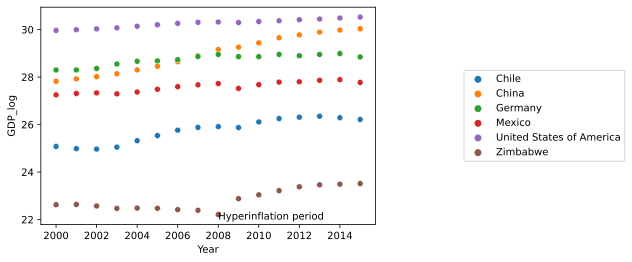

In [10]:
fig,ax=plt.subplots()
ax=sns.scatterplot(data=df, x='Year',y='GDP_log', hue='Country')
lgd=ax.legend(bbox_to_anchor=(1.25, 0.5),loc='center left', ncol=1);
ax.text(2008,22,'Hyperinflation period')
plt.savefig('GDPscatter.jpg', bbox_extra_artists=[lgd,], bbox_inches='tight')

![GDPscatter](GDPscatter.png)

So, in the 15 year period most countries experienced a mostly positive GDP evolution trend, the US and Mexico have the flattest curves. The financial crisis of 2007-2008 affected some coutries more than others, and China not at all. 2015 was again a bad year for most countries.

In [ ]:
fig = plt.figure(1)
#ax = fig.add_subplot(111)
ax=sns.scatterplot(data=df, x='Year',y='Age', hue='Country');

handles, labels = ax.get_legend_handles_labels()
lgd=ax.legend(handles, labels,bbox_to_anchor=(0, 0.5),loc='center left', ncol=1);
plt.savefig('test.jpg', bbox_extra_artists=[lgd,], bbox_inches='tight')

![scatterAge](scatterAge.png)

Germany has the highest life expectancy, with a slowly increasing trend. All countries seem to see increases in life expectancy, but the increase in Zimbabwe is very high, especially considering the data spans a period of 15 years, so less than a generation. How was the data collected? Did they calculate the average age at death of people who died in a particular year? It is interesting that the dip in GDP in 2008 corresponds to a light dip in life expectancy in Mexico around the same time...natural fluctuation or something else?<br>
<br>
Chile has a higher life expectancy than the US even if it has a significantly lower GDP. Good genes or better diet?

In [ ]:
sns.displot(data=df,x='GDP_log',y='Age', kind='kde', hue='Country', rug=True, height=6,aspect=1.2);
#plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.savefig ('KDE.png')
None

![KDE](KDE.png)

I am not quite sure how to interpret all the squiggling in this KDE plot, but it sums up information from previous graphs: <br>
* Zimbabwe has the lowest GDP and the lowest life expectancy. 
* China has the widest GDP range because it experienced a continuous GDP increase over the entire time span. While it has a relatively high life expectancy, it is still lower than that of the US and Germany.
* Chile, while having the second lowest GDP has a life expectancy comparable to the US, the country with the highest GDP. as mentioned before the GDP per capita would be probably the more representative indicator.

I went online and got the population data for 2014 [here](https://www.prb.org/wp-content/uploads/2015/11/2014-world-population-data-sheet_eng.pdf). 

In [ ]:
data={'Germany':80.9,'Zimbabwe':14.7,'Chile':17.7, 'Mexico':119.7,'United States of America':317.7,'China':1364.1}
population=pd.DataFrame(list(data.items()), columns=['Country', '2014_pop'])
population=population.set_index('Country').sort_index()
yr_2014=df[df['Year']==2014].set_index('Country')['GDP']
life_expectancy_2014=df[df['Year']==2014].set_index('Country')['Age']
population['GDP_2014']=yr_2014
population['GDP_per_capita']=population['GDP_2014']/(population['2014_pop']*10**6)
population['Life_expectancy']=life_expectancy_2014
population

In [ ]:
sns.scatterplot(data=population, x='GDP_per_capita', y='Life_expectancy', hue=population.index);
plt.savefig ('percapita.png')

![capita](percapita.png)

Reported to the per capita GDP, the life expectancy makes more sense. Zimbabwe's per capita GDP is by far the lowest, being the only poor coutry on the list. China, Mexico and Chile belong to the group of developing countries with high-ish GDPs and high life expectancies. Germany and USA, the two rich countries on the list have GDP that is several times higher than that of the countries in the developing block. While Germany has also a higher life expectancy, the US doesn't due to political and social factors which are known, but still ignored. The fact that the life expectancy in Germany is only slightly higher than that in Chile speaks to the fact that there is a maximum life expectancy which is biologically determined (the length of our telomeres), and that we are getting there unless there is a major breakthrough in genetics in the coming decades.